<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Les bases de la syntaxe Keras

Avec TensorFlow 2.x , Keras est désormais le principal choix d'API. Nous allons travailler sur un projet de régression simple pour comprendre les bases de la syntaxe de Keras et de l'ajout de couches.

## Les données

Pour apprendre la syntaxe de base de Keras, nous utiliserons un ensemble de fausses données très simple. Dans les sessions suivantes, nous nous concentrerons sur des ensembles de données réels, ainsi que sur l'ingénierie des caractéristiques (feature engineering) ! Pour l'instant, concentrons-nous sur la syntaxe de TensorFlow 2.x.

Imaginons que ces données soient les mesures de quelques pierres précieuses rares, avec deux caractéristiques de mesure et un prix de vente. Notre objectif final serait d'essayer de prédire le prix de vente d'une nouvelle pierre précieuse que nous venons d'extraire du sol, afin d'essayer de fixer un prix équitable sur le marché.

### Chargement des données

In [ ]:
import pandas as pd

In [ ]:
# df = pd.read_csv('fake_reg.csv')

# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
url = 'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/fake_reg.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


## Exploration des données

Jetons un coup d'œil rapide, nous devrions constater une forte corrélation entre les caractéristiques (features) et le "prix" de ce produit composé.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

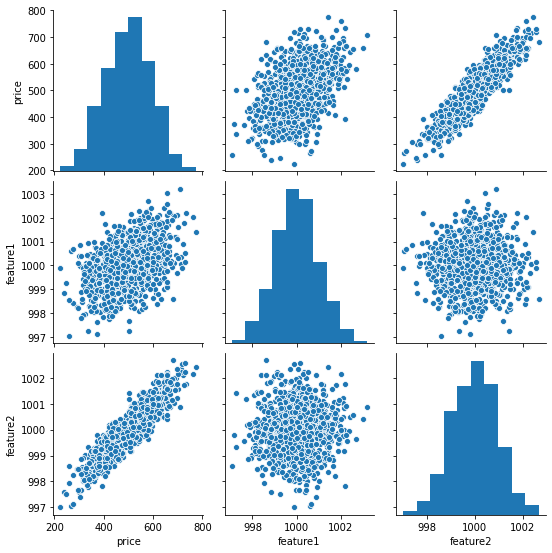

In [ ]:
sns.pairplot(df);

N'hésitez pas à faire davantage de visualisations de données. Mais ces données sont fausses donc ,nous nous concentrerons sur l'ingénierie des fonctionnalités (feature engineering) et l'analyse exploratoire des données (exploratory data analysis) plus tard dans le cours, de manière beaucoup plus détaillée !

## Répartition Entraînement / Test (Train / Test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Convertir Pandas en Numpy pour Keras

# Features (ou caractéristiques)
X = df[['feature1','feature2']].values

# Label (ou étiquette)
y = df['price'].values

# Split (séparation / répartition)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_test.shape

(300, 2)

In [ ]:
y_train.shape

(700,)

In [ ]:
y_test.shape

(300,)

## Normalisation et mise à l'échelle des données

Nous mettons à l'échelle les données relatives aux caractéristiques.

[Pourquoi nous n'avons pas besoin de mettre le label à l'échelle] (https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), de

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Remarque : pour éviter les fuites de données de l'ensemble de test, nous n'adaptons notre scaler qu'à l'ensemble d'entraînement

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Syntaxe TensorFlow 2.x


## Options d'importation

Vous pouvez importer Keras de Tensorflow de plusieurs façons (c'est un choix très personnel, veuillez utiliser les méthodes d'importation que vous préférez). Nous utiliserons la méthode indiquée dans la **documentation officielle de TF**.

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model does

##Création d'un modèle

Il y a deux façons de créer des modèles via l'API TF 2 Keras, soit en passant une liste de couches en une seule fois, soit en les ajoutant une par une.

Montrons les deux méthodes (c'est à vous de choisir celle que vous préférez).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Modèle - avec liste de couches

In [ ]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Modèle - ajout des couches une par une

In [ ]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Continuons et construisons un modèle simple, puis compilons-le en définissant notre solveur

In [ ]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Couche finale pour notre prédiction avec un seul noeud de sortie
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choix d'un optimiseur (optimizer) et perte (loss)

Gardez à l'esprit le type de problème que vous essayez de résoudre :

    # Pour un problème de classification multi-classes
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Pour un problème de classification binaire
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Pour un problème de régression de l'erreur quadratique moyenne
    model.compile(optimizer='rmsprop',
                  loss='mse')

## Entraînement

Vous trouverez ci-dessous quelques définitions courantes qu'il est nécessaire de connaître et de comprendre pour utiliser correctement Keras :

* Sample (Échantillon) : un élément d'un ensemble de données.
    * Exemple : une image est un échantillon dans un réseau convolutif
    * Exemple : un fichier audio est un échantillon pour un modèle de reconnaissance vocale
* Batch (Lot) : un ensemble de N échantillons. Les échantillons d'un batch sont traités indépendamment, en parallèle. En cas d'entraînement, un batch ne donne lieu qu'à une seule mise à jour du modèle. Un batch se rapproche généralement davantage de la distribution des données d'entrée qu'une seule entrée. Plus le batch est important, meilleure est l'approximation ; cependant, il est également vrai que le traitement du batch sera plus long et qu'il ne donnera lieu qu'à une seule mise à jour. Pour l'inférence (évaluation/prédiction), il est recommandé de choisir un batch aussi grand que possible sans épuiser la mémoire (car des batchs plus grands entraînent généralement une évaluation/prédiction plus rapide).
* Epoch (période d'entraînement) : un seuil arbitraire, généralement défini comme "un passage sur l'ensemble des données", utilisée pour séparer l'entraînement en phases distinctes, ce qui est utile pour l'enregistrement et l'évaluation périodique.
* En utilisant validation_data ou validation_split avec la méthode d'ajustement des modèles de Keras, l'évaluation sera effectuée à la fin de chaque Epoque.
* Dans Keras, il est possible d'ajouter des rappels spécifiquement conçus pour être exécutés à la fin d'une Epoque. Il s'agit par exemple de changements de taux d'apprentissage et de contrôle (sauvegarde) des modèles.

In [ ]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 2ms/step - loss: 256671.0469
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256499.4219
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256300.5000
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256085.8281
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255851.9062
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255595.1250
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255315.8125
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255012.5312
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254681.7188
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254322.2812
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 253937.0781
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

## Évaluation

Évaluons nos performances sur notre ensemble d'entraînement et sur notre ensemble de test. Nous pouvons comparer ces deux performances pour vérifier qu'il n'y a pas d'overfitting (ou sur-apprentissage).

In [ ]:
model.history.history

{'loss': [256671.046875,
  256499.421875,
  256300.5,
  256085.828125,
  255851.90625,
  255595.125,
  255315.8125,
  255012.53125,
  254681.71875,
  254322.28125,
  253937.078125,
  253522.65625,
  253076.984375,
  252596.796875,
  252085.6875,
  251537.6875,
  250944.40625,
  250293.53125,
  249595.75,
  248843.34375,
  248032.203125,
  247156.703125,
  246220.59375,
  245219.75,
  244149.625,
  243010.015625,
  241793.515625,
  240499.59375,
  239126.5625,
  237672.203125,
  236134.5625,
  234510.875,
  232797.890625,
  230983.359375,
  229081.4375,
  227077.890625,
  224976.9375,
  222774.171875,
  220462.328125,
  218049.46875,
  215527.796875,
  212886.109375,
  210143.703125,
  207280.609375,
  204309.390625,
  201224.390625,
  198003.6875,
  194682.28125,
  191238.671875,
  187684.328125,
  184025.4375,
  180215.28125,
  176287.984375,
  172274.828125,
  168138.4375,
  163892.109375,
  159516.03125,
  155053.9375,
  150480.953125,
  145824.578125,
  141034.921875,
  136169.7968

In [ ]:
loss = model.history.history['loss']

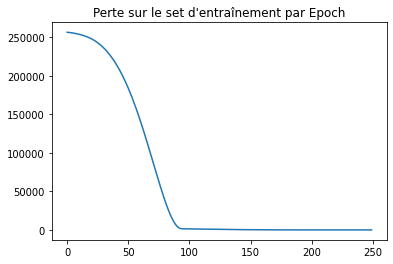

In [ ]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Perte sur le set d'entraînement par Epoch");

### Comparation de l'évaluation finale (MSE) sur le set d'entraînement et le set de test.

Il faut espérer qu'ils soient assez proches l'un de l'autre.

In [ ]:
model.metrics_names

['loss']

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [ ]:
training_score

23.823219299316406

In [ ]:
test_score

25.504478454589844

### Évaluations complémentaires

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_predictions

array([[405.78128],
       [624.33813],
       [592.8896 ],
       [572.94495],
       [367.039  ],
       [579.9133 ],
       [515.6843 ],
       [459.6808 ],
       [549.9318 ],
       [448.07782],
       [612.5683 ],
       [549.6541 ],
       [419.60983],
       [409.363  ],
       [652.0949 ],
       [437.84015],
       [509.10135],
       [660.7689 ],
       [663.43176],
       [566.26056],
       [334.61176],
       [445.38028],
       [382.98053],
       [379.21   ],
       [567.31287],
       [611.36505],
       [533.05927],
       [428.38516],
       [656.2793 ],
       [414.5914 ],
       [443.18622],
       [485.73215],
       [438.9539 ],
       [682.72253],
       [425.28668],
       [418.1892 ],
       [502.571  ],
       [551.1728 ],
       [510.36093],
       [395.821  ],
       [619.3865 ],
       [417.1405 ],
       [605.2242 ],
       [446.51953],
       [502.61676],
       [582.4721 ],
       [669.8759 ],
       [491.0203 ],
       [318.9555 ],
       [486.03055],


In [ ]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [ ]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [ ]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [ ]:
test_predictions

0      405.781281
1      624.338135
2      592.889587
3      572.944946
4      367.039001
          ...    
295    529.704041
296    515.953796
297    610.432312
298    417.469910
299    411.369568
Length: 300, dtype: float32

In [ ]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [ ]:
pred_df.columns = ['Test Y','Model Predictions']

In [ ]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.781281
1,624.156198,624.338135
2,582.455066,592.889587
3,578.588606,572.944946
4,371.224104,367.039001
...,...,...
295,525.704657,529.704041
296,502.909473,515.953796
297,612.727910,610.432312
298,417.569725,417.469910


Comparons avec les vrais labels de test !

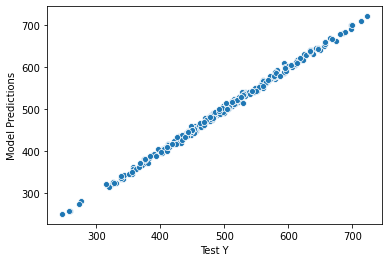

In [ ]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [ ]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

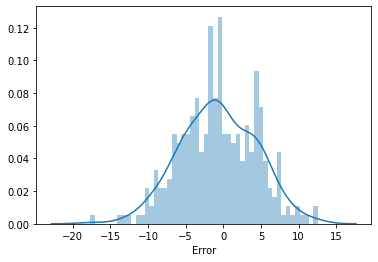

In [ ]:
sns.distplot(pred_df['Error'],bins=50)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.069630782828413

In [ ]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.504483532081284

In [ ]:
# Essentiellement la même chose, la différence est due à la précision
test_score

25.504478454589844

In [ ]:
#RMSE
test_score**0.5

5.050195882794037

## Prédire sur de toutes nouvelles données

Et si nous voyions une toute nouvelle pierre précieuse sortir de terre ? À quel prix devrions-nous la vendre ? C'est l'**exacte** même procédure que de prédire sur de nouvelles données de test !

In [ ]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [ ]:
# N'oubliez pas de mettre à l'échelle !
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [ ]:
new_gem = scaler.transform(new_gem)

In [ ]:
model.predict(new_gem)

array([[420.18478]], dtype=float32)

## Sauvegarde et chargement d'un modèle

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_model.h5') # crée un fichier HDF5 'mon_modèle.h5

In [ ]:
later_model = load_model('my_model.h5')

In [ ]:
later_model.predict(new_gem)

array([[420.18478]], dtype=float32)